# Import Relevent Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
df = pd.read_csv('Daily Household Transactions.csv')

In [3]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


# Check the first Five Rows

In [4]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


# Understand the Structure of the Datframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


# Check the Missing Values

In [6]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

**Exploration Summary**

- We have a dataset consisting of 2461 rows and 8 columns.
- Our dataset has null values, and we will check if there are any duplicate values have nor not, if yes, then we will fix it.
- The "Date" column needs to be changed to Date and Time format.
- We will keep the "Date" column as it is and create a separate column called "Time" so that we can remove the times in the date from the "Date" column and add them to the "Time" column
- If there are any null values in the "Date" column, then we will remove them.
- There are noticeable outliers in the "Amount" column.

# Fill the Missing Values 

In [7]:
df['Subcategory'] = df['Subcategory'].fillna("Unknown")

df['Note'] = df['Note'].fillna("No Info")

In [8]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

# Convert "Date" column to Date and Time format

In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True, errors = 'coerce')

In [10]:
df.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

# Checking the Null Values in the "Date" column

In [11]:
df['Date'].isnull().sum()

1158

# Remove the Null Values in the "Date" column

In [12]:
df.dropna(subset = ['Date'], inplace = True)

In [13]:
df['Date'].isnull().sum()

0

In [14]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

# Create the "Time" column

In [15]:
df['Time'] = df['Date'].dt.time

df['Date'] = df['Date'].dt.date

In [16]:
df[['Date', 'Time']].head()

,Date,Time
0,2018-09-20,12:04:08
1,2018-09-20,12:03:15
3,2018-09-17,23:41:17
4,2018-09-16,17:15:08
5,2018-09-15,06:34:17


In [17]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Time
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,12:04:08
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,12:03:15
3,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,23:41:17
4,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,17:15:08
5,2018-09-15,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,06:34:17


# Checking the Duplicate Values 

In [18]:
df.duplicated().sum()

0

# Reset the Index

In [19]:
df.reset_index(drop = True, inplace = True)

In [20]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Time
0,2018-09-20,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,12:04:08
1,2018-09-20,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,12:03:15
2,2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,23:41:17
3,2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,17:15:08
4,2018-09-15,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,06:34:17


# Exploratory Data Analysis (EDA)

### Summary Statistics of the Data

In [21]:
df.describe()

,Amount
count,1303.000000
mean,3076.396892
std,14608.948853
min,2.000000
25%,30.000000
50%,72.000000
75%,298.500000
max,250000.000000


### Check the most usable Payment method

In [22]:
df['Mode'].value_counts()

Mode
Cash                     614
Saving Bank account 1    566
Credit Card              112
Share Market Trading       4
Saving Bank account 2      3
Recurring Deposit          2
Debit Card                 1
Fixed Deposit              1
Name: count, dtype: int64

### Check most common Transaction Category

In [23]:
df['Category'].value_counts()

Category
Food                         516
Transportation               199
Household                    127
subscription                  79
Other                         76
Health                        52
Salary                        42
Family                        41
Apparel                       29
Gift                          20
Beauty                        12
Festivals                     11
Interest                      10
Education                     10
Money transfer                 8
Gpay Reward                    8
Dividend earned on Shares      8
Bonus                          5
Saving Bank account 1          5
maid                           5
Culture                        5
Tourism                        4
Petty cash                     4
Share Market                   3
Grooming                       3
Maturity amount                3
Investment                     2
Recurring Deposit              2
water (jar /tanker)            2
Fixed Deposit                  2
s

### Check most used Subcategory

In [24]:
df['Subcategory'].value_counts()

Subcategory
Unknown        262
auto            95
Milk            92
snacks          73
Grocery         66
              ... 
makeup           1
Lab Tests        1
Books            1
Leisure          1
Mutual fund      1
Name: count, Length: 83, dtype: int64

# Data Visualization

### Count Income vs Expense

In [25]:
df['Income/Expense'].value_counts()

Income/Expense
Expense         1199
Income            91
Transfer-Out      13
Name: count, dtype: int64

In [26]:
labels = df['Income/Expense'].value_counts().index

sizes = df['Income/Expense'].value_counts().values

In [27]:
print(labels)

Index(['Expense', 'Income', 'Transfer-Out'], dtype='object', name='Income/Expense')


In [28]:
print(sizes)

[1199   91   13]


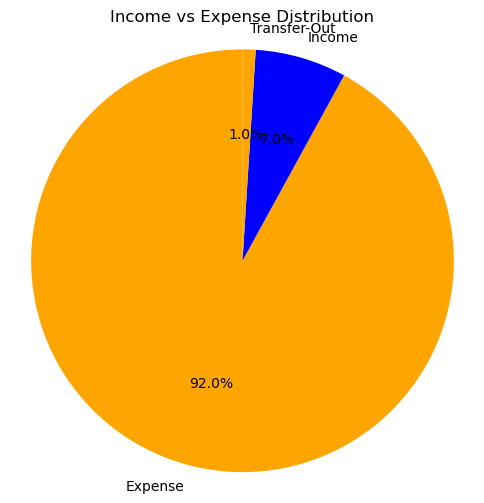

In [30]:
plt.figure(figsize = (6,6))
plt.pie(sizes, labels = labels, 
        autopct = '%1.1f%%', startangle = 90, colors = ['orange','blue'])
plt.title('Income vs Expense Distribution')
plt.axis('equal')
plt.show()

### Top 5 Payment Methods

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

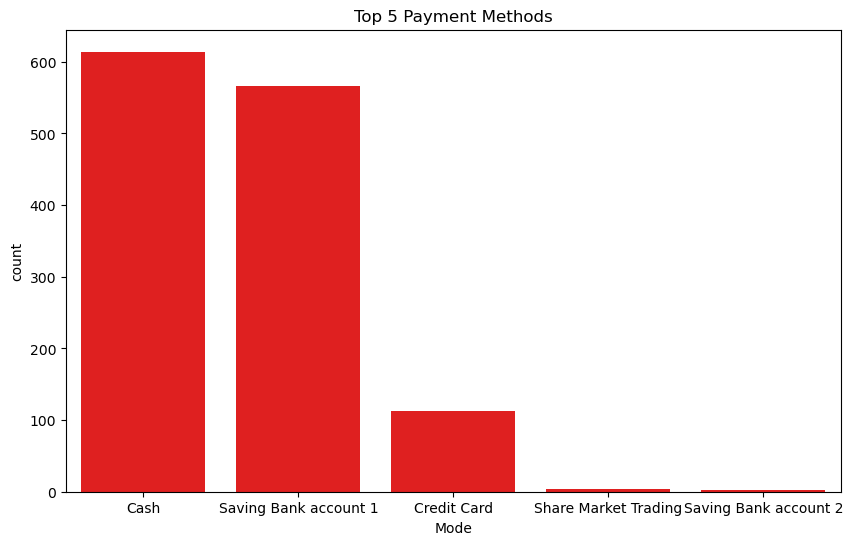

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Mode', 
              order = df['Mode'].value_counts().head(5).index, color = 'Red')
plt.title('Top 5 Payment Methods')
plt.show()

### Top 5 Transaction Categories

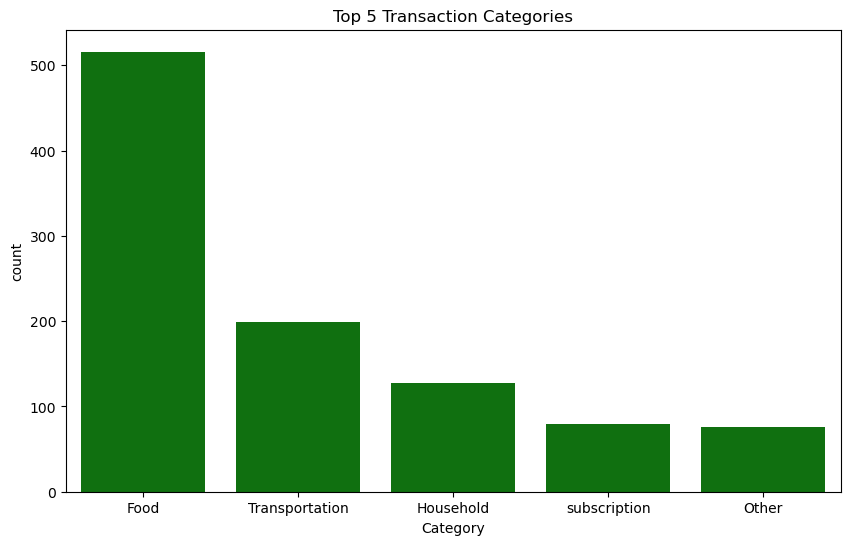

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Category', 
              order = df['Category'].value_counts().head(5).index,
              color = 'Green')
plt.title('Top 5 Transaction Categories')
plt.show()

### Check how much Amount spends in per Category

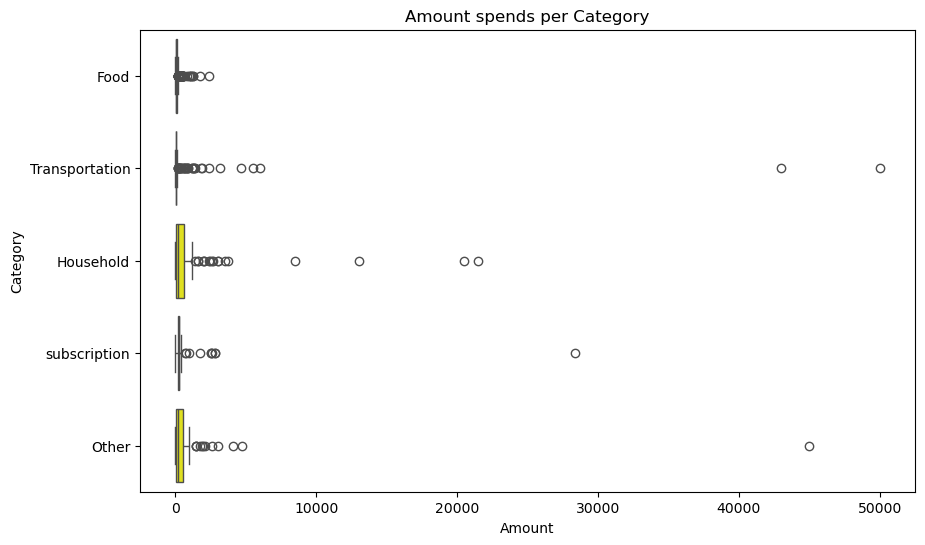

In [34]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Amount', y = 'Category',
              order = df['Category'].value_counts().head(5).index, 
              color = 'Yellow')
plt.title('Amount spends per Category')
plt.show()

# Time Series Analysis

### Total Spent per Day

In [35]:
day = df.groupby('Date')['Amount'].sum()

In [36]:
day.head()

Date
2015-01-13    510.0
2015-01-14    893.0
2015-01-15    265.0
2015-01-16     90.0
2015-01-18     97.0
Name: Amount, dtype: float64

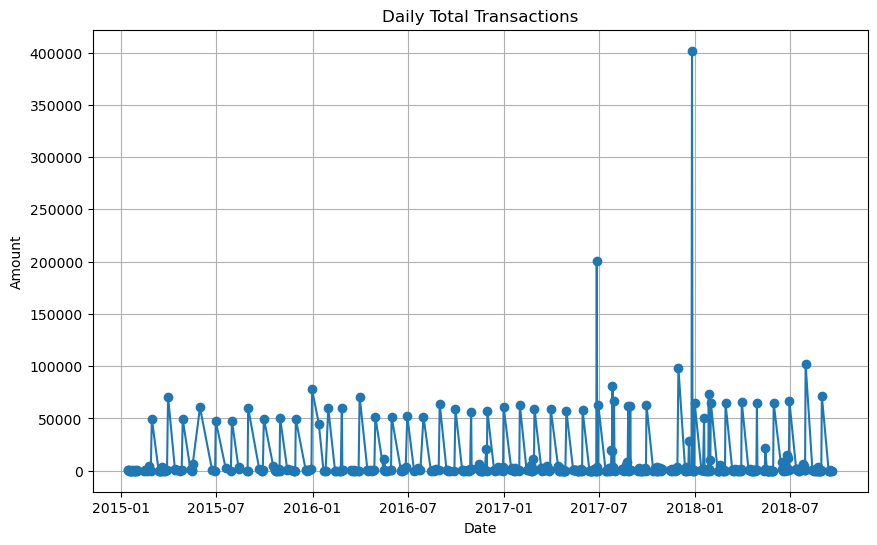

In [37]:
plt.figure(figsize = (10,6))
plt.plot(day.index, day.values, marker = 'o', linestyle = '-')
plt.title('Daily Total Transactions')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

### Total Spent per Month

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
Time                      object
dtype: object

In [40]:
monthly = df.resample('M', on = 'Date')['Amount'].sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8484\266201770.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on = 'Date')['Amount'].sum()


In [41]:
monthly.head()

Date
2015-01-31     4434.0
2015-02-28    56516.0
2015-03-31    77315.8
2015-04-30    53097.0
2015-05-31    68935.0
Freq: ME, Name: Amount, dtype: float64

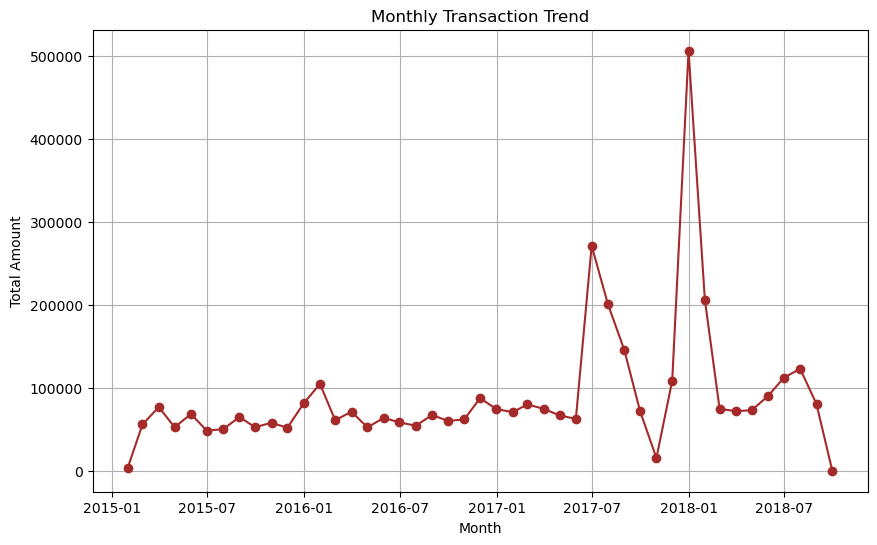

In [42]:
plt.figure(figsize = (10,6))
plt.plot(monthly.index, monthly.values, marker = 'o', linestyle = '-', color = 'Brown')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Analyze the Correlation between Transaction Categories and Amounts

In [43]:
pivot = df.pivot_table(index = 'Date', columns = 'Category', values = 'Amount', aggfunc = 'sum', fill_value = 0)

In [44]:
pivot.head()

Category,Amazon pay cashback,Apparel,Beauty,Bonus,Culture,Dividend earned on Shares,Education,Equity Mutual Fund C,Family,Festivals,...,Self-development,Share Market,Social Life,Tax refund,Tourism,Transportation,maid,scrap,subscription,water (jar /tanker)
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,760.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
2015-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0
2015-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
correlation = pivot.corr()

print(correlation)

Category                   Amazon pay cashback   Apparel    Beauty     Bonus  \
Category                                                                       
Amazon pay cashback                   1.000000 -0.005214 -0.003349 -0.002259   
Apparel                              -0.005214  1.000000 -0.007208 -0.004864   
Beauty                               -0.003349 -0.007208  1.000000 -0.003124   
Bonus                                -0.002259 -0.004864 -0.003124  1.000000   
Culture                              -0.004588 -0.009876  0.023782 -0.004280   
Dividend earned on Shares            -0.005003 -0.004288 -0.006917 -0.004668   
Education                            -0.006249  0.007626  0.006853 -0.005830   
Equity Mutual Fund C                 -0.002221 -0.004781 -0.003071 -0.002072   
Family                               -0.009025 -0.019370 -0.012477 -0.007589   
Festivals                            -0.004890 -0.007650 -0.006760 -0.004561   
Fixed Deposit                        -0.

In [46]:
correlation.head()

Category,Amazon pay cashback,Apparel,Beauty,Bonus,Culture,Dividend earned on Shares,Education,Equity Mutual Fund C,Family,Festivals,...,Self-development,Share Market,Social Life,Tax refund,Tourism,Transportation,maid,scrap,subscription,water (jar /tanker)
Category,,,,,,,,,,,,,,,,,,,,,
Amazon pay cashback,1.000000,-0.005214,-0.003349,-0.002259,-0.004588,-0.005003,-0.006249,-0.002221,-0.009025,-0.004890,...,-0.002221,-0.003294,-0.002221,-0.002832,-0.002288,-0.002813,-0.004597,-0.002431,0.006332,-0.003144
Apparel,-0.005214,1.000000,-0.007208,-0.004864,-0.009876,-0.004288,0.007626,-0.004781,-0.019370,-0.007650,...,-0.004781,-0.007090,-0.004781,-0.006097,-0.002455,-0.005850,-0.001878,-0.004008,-0.009542,-0.006768
Beauty,-0.003349,-0.007208,1.000000,-0.003124,0.023782,-0.006917,0.006853,-0.003071,-0.012477,-0.006760,...,-0.003071,-0.004553,-0.003071,-0.003916,-0.003164,-0.006508,-0.006355,-0.003362,-0.006284,-0.004347
Bonus,-0.002259,-0.004864,-0.003124,1.000000,-0.004280,-0.004668,-0.005830,-0.002072,-0.007589,-0.004561,...,-0.002072,-0.003073,-0.002072,-0.002642,-0.002135,-0.004434,-0.004288,-0.002268,-0.004124,-0.002933
Culture,-0.004588,-0.009876,0.023782,-0.004280,1.000000,-0.009477,-0.011836,-0.004207,-0.006622,-0.009261,...,-0.004207,-0.006239,-0.004207,-0.005365,-0.004334,-0.008065,-0.008707,-0.004606,-0.008667,-0.005955


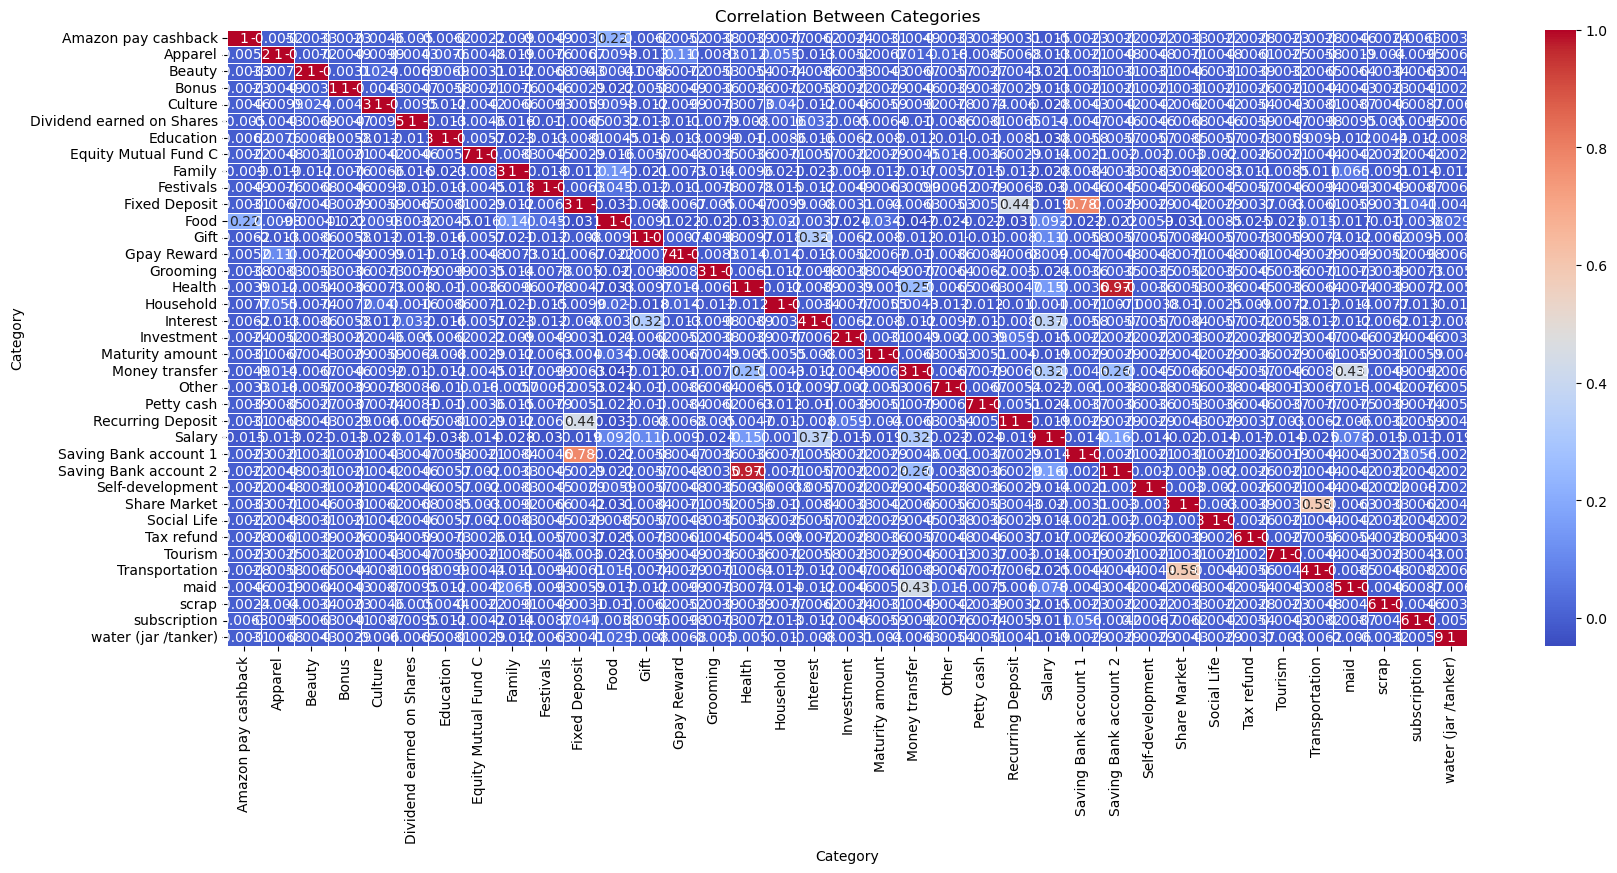

In [47]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Categories")
plt.show()

# Project Overview

#### This project analyzes a datset of **Daily Household Transactions** to uncover spending patterns like **Income vs Expense** trends, **Payment Habits** and **Category wise Behaviours**. The goal is to gain **Financial Insights** using **Panadas**, **Matplotlib** and **Seaborn** in Python.

# Generate Report

#### Step 1 : Data Cleaning

- Loaded the dataset from 'Daily Household Transactions.csv'.
- Filled missing values in "Subcategory" and "Note" replaced with 'Unknown' and 'No Info'.
- Converted the "Date" column to datetime format using pd.to_datetime().
- Split 'Date' into separate "Date" and "Time" columns.
- Remove rows with missing and invalid dates.
- Dropped duplicate record and Reset the index.

#### Step 2 : Exploratory Data Analysis (EDA)

- **Top Transaction Categories** : Identified the most frequent spending areas like **Food**, **Transport** and **Utilities**.

- **Most Used Payment Methods** : **Cash** and **Bank Transfers** were the most common.

#### Step 3 : Time Series Analysis

- **Daily Trends** : Created a line chart to visualize **Total Spending Per Day**.

- **Monthly Trends** : Aggregated Transactions by Month to observe **Spending patterns Over Time**.

#### Step 4 : Correlation Analysis 

- **Created a Pivot Table** : pivot_table(index='Date', columns='Category', values='Amount').

- **Calculated Correlation between Transaction Categories and Amounts** : Detected strong relationships between **Transaction Categories** like **Food** and **Transport** or **Shopping** and **Bills**.

- Visualized Correlations using a **Seaborn heatmap** (sns.heatmap()).

# Visualizations

- **Bar Chart** : Top 5 Transaction Categories.

- **Pie Chart** : Income vs Expense.

- **Line Plot** : Daily and Monthly Spending Trends.

- **Heatmap** : Correlation between Transaction Categories and Amounts.

- **Count Plot** : Top 5 Payment Methods.

# Key Insights

- Spending is highest in categories like Food, Transport, and Utilities.
- Cash is the most commonly used payment mode.
- Most expenses happen toward the middle and end of each month.
- Some categories have strong correlation, meaning people often spend on them together.

# Used Tools

- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn

# Summary

**The Financial Transactions Dataset was analyzed to identify key trends and insights. The
data cleaning process involved handling missing values, correcting data types, and
removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of
transaction amounts, transaction counts by category and type, and significant patterns
over time. Time series analysis highlighted monthly and daily transaction trends.
Correlation analysis identified relationships between different transaction categories**.
